# Exploratory Data Analysis

In [0]:

# IMporting Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer

## Load Data

In [0]:
df = pd.read_csv('car.csv')

In [0]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [306]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61210 entries, 0 to 61209
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                61210 non-null  object 
 1   model                61210 non-null  object 
 2   mileage              61210 non-null  float64
 3   manufacture_year     61210 non-null  float64
 4   engine_displacement  61210 non-null  float64
 5   engine_power         61210 non-null  float64
 6   stk_year             61210 non-null  object 
 7   transmission         61210 non-null  object 
 8   door_count           61210 non-null  object 
 9   seat_count           61210 non-null  object 
 10  fuel_type            61210 non-null  object 
 11  date_created         61210 non-null  object 
 12  price_eur            61210 non-null  float64
dtypes: float64(5), object(8)
memory usage: 6.1+ MB


(61210, 13)

In [305]:
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'stk_year', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'date_created', 'price_eur'],
      dtype='object')

### Missing Data Handling

In [0]:
df.isnull().sum()

maker                  24928
model                  32019
mileage                35226
manufacture_year       21750
engine_displacement    25153
engine_power           33270
body_type               9886
color_slug             61210
stk_year                   0
transmission           39752
door_count                 0
seat_count                 0
fuel_type                  0
date_created               0
date_last_seen             1
price_eur                  1
dtype: int64

In [0]:
df.mileage.value_counts(dropna=False)

NaN          35226
100.0          653
0.0            176
180000.0       150
150000.0       144
             ...  
145050.0         1
8197000.0        1
631407.0         1
169800.0         1
125757.0         1
Name: mileage, Length: 10925, dtype: int64

In [0]:
df.drop(['color_slug','body_type', 'date_last_seen'], axis = 1, inplace = True)

In [0]:
df.fillna(axis = 0, method ='ffill', inplace = True)
df.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
stk_year               0
transmission           0
door_count             0
seat_count             0
fuel_type              0
date_created           0
price_eur              0
dtype: int64

## Univariate Analysis

In [0]:
df.maker.value_counts()

skoda            15401
ford              7890
bmw               6063
audi              4562
opel              4253
fiat              3493
citroen           3465
seat              1827
hyundai           1629
mercedes-benz     1423
mazda             1254
nissan            1235
volvo             1040
suzuki            1035
toyota            1008
kia               1003
honda              784
mitsubishi         721
rover              485
chevrolet          483
subaru             423
chrysler           422
jeep               251
smart              204
mini               182
lancia             157
porsche            135
jaguar             119
dodge              116
lexus               66
hummer              36
isuzu               29
maserati             7
tesla                7
bentley              2
Name: maker, dtype: int64

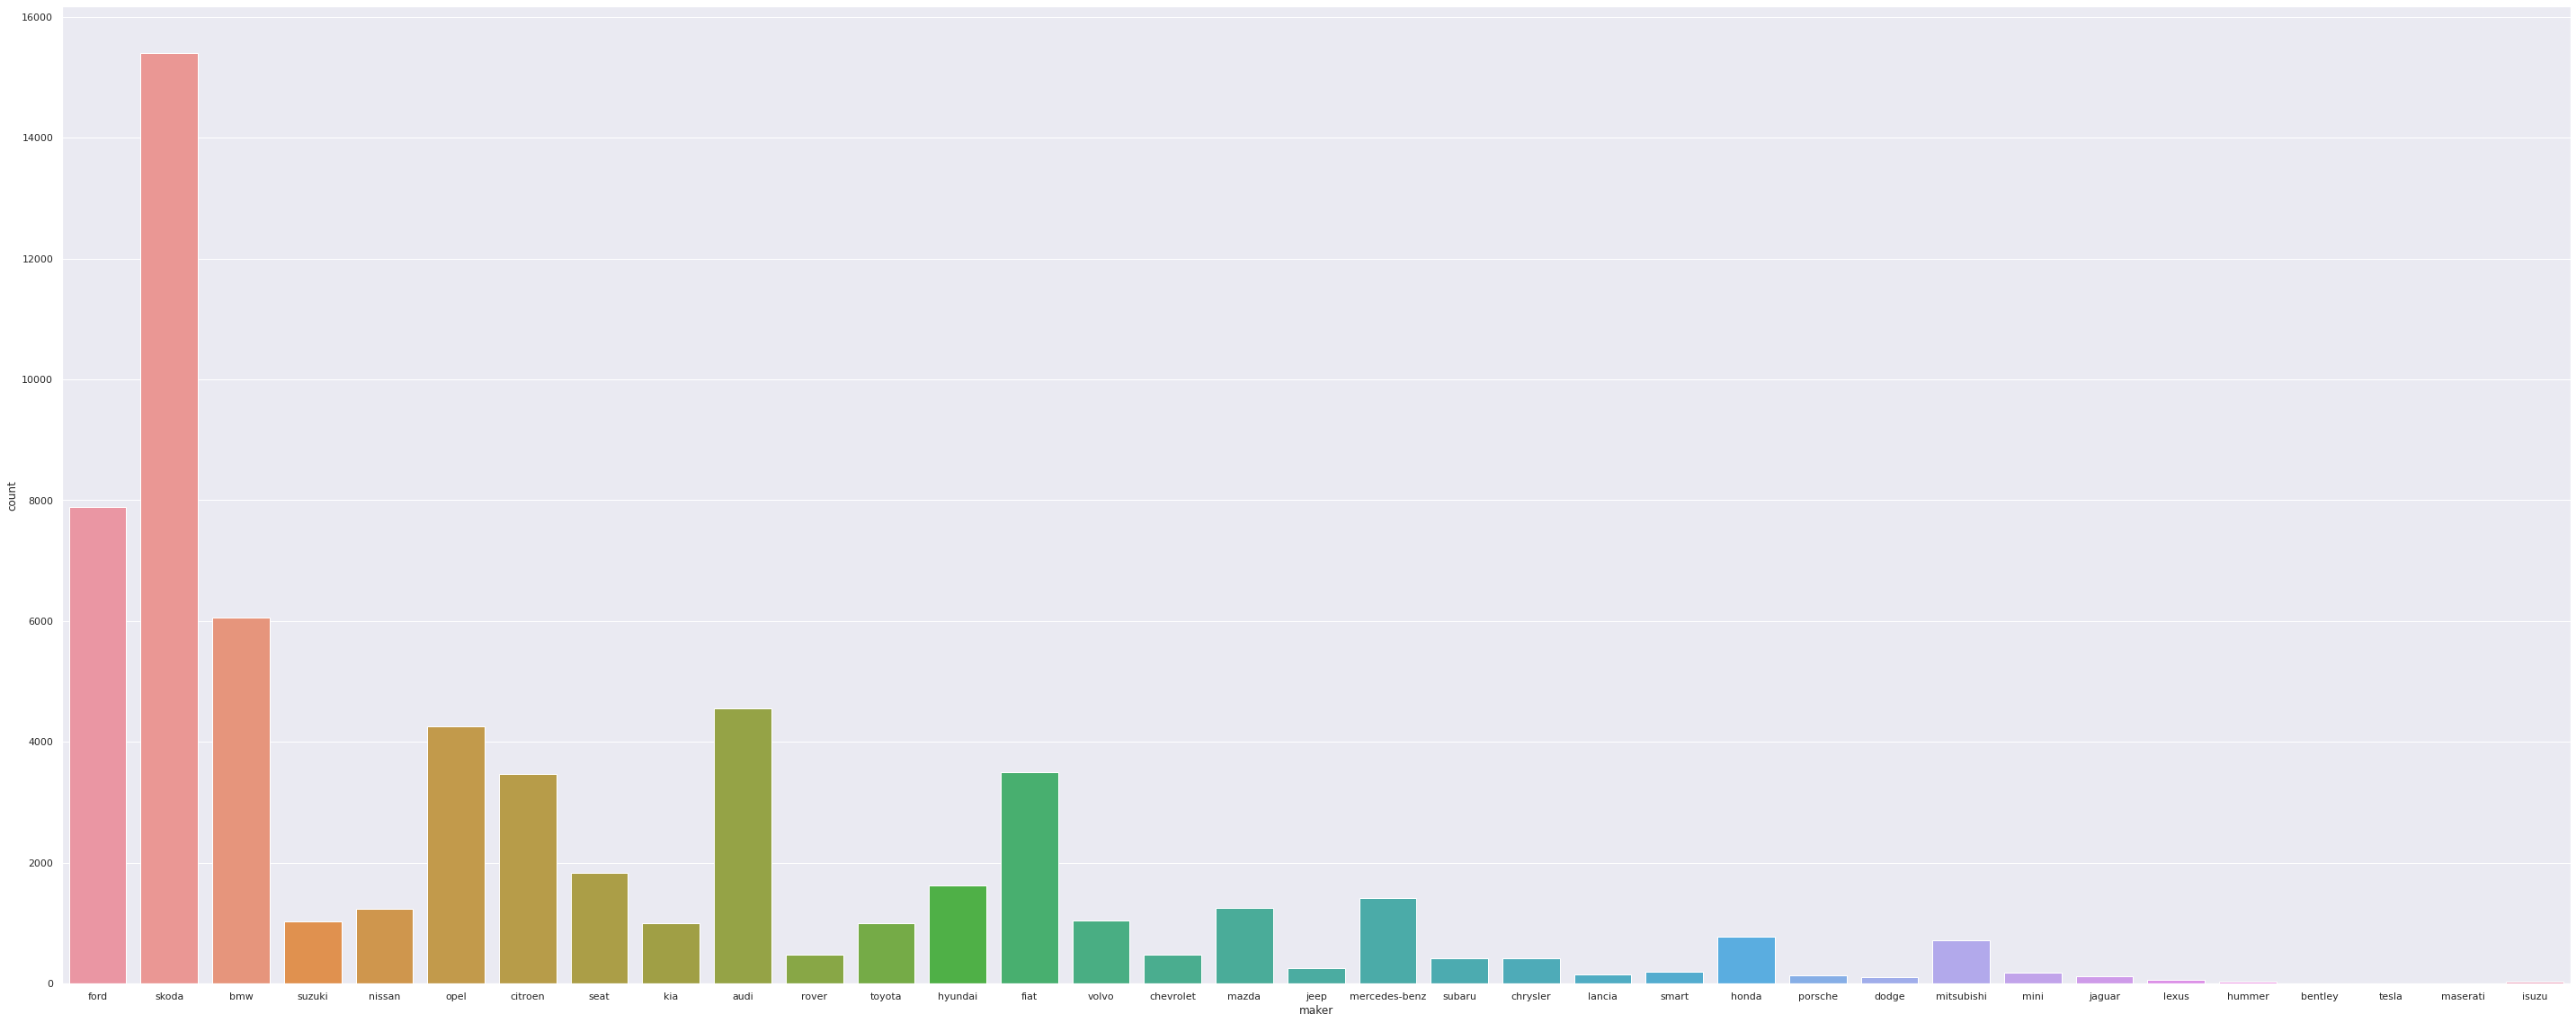

In [0]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = 'maker', data = df)

In [0]:
column_names = df.columns



























### Encoding Categorical data

In [0]:
df.maker.value_counts()


skoda            15401
ford              7890
bmw               6063
audi              4562
opel              4253
fiat              3493
citroen           3465
seat              1827
hyundai           1629
mercedes-benz     1423
mazda             1254
nissan            1235
volvo             1040
suzuki            1035
toyota            1008
kia               1003
honda              784
mitsubishi         721
rover              485
chevrolet          483
subaru             423
chrysler           422
jeep               251
smart              204
mini               182
lancia             157
porsche            135
jaguar             119
dodge              116
lexus               66
hummer              36
isuzu               29
maserati             7
tesla                7
bentley              2
Name: maker, dtype: int64

In [0]:
## RAM is not supported for One hot encoding so we will use label encoding
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,stk_year,transmission,door_count,seat_count,fuel_type,date_created,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2738.71


In [0]:
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
price_eur              float64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['maker', 'model', 'stk_year', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'date_created'],
      dtype='object')


In [0]:
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61210 entries, 0 to 61209
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                61210 non-null  int64  
 1   model                61210 non-null  int64  
 2   mileage              61210 non-null  float64
 3   manufacture_year     61210 non-null  float64
 4   engine_displacement  61210 non-null  float64
 5   engine_power         61210 non-null  float64
 6   stk_year             61210 non-null  int64  
 7   transmission         61210 non-null  int64  
 8   door_count           61210 non-null  int64  
 9   seat_count           61210 non-null  int64  
 10  fuel_type            61210 non-null  int64  
 11  date_created         61210 non-null  int64  
 12  price_eur            61210 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 6.1 MB
None


In [0]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,stk_year,transmission,door_count,seat_count,fuel_type,date_created,price_eur
0,8,202,151000.0,2011.0,2000.0,103.0,44,1,3,5,0,0,10584.75
1,28,313,143476.0,2012.0,2000.0,81.0,44,1,3,3,0,1,8882.31
2,2,313,97676.0,2010.0,1995.0,85.0,44,1,3,3,0,2,12065.06
3,28,188,111970.0,2004.0,1200.0,47.0,44,1,3,3,1,3,2960.77
4,28,188,128886.0,2004.0,1200.0,47.0,44,1,3,3,1,4,2738.71


### Feature Scaling

Standardization, also called Z-score normalisation.

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
df = pd.DataFrame(sc.fit_transform(df))
df.columns = column_names

### Outlier Detection

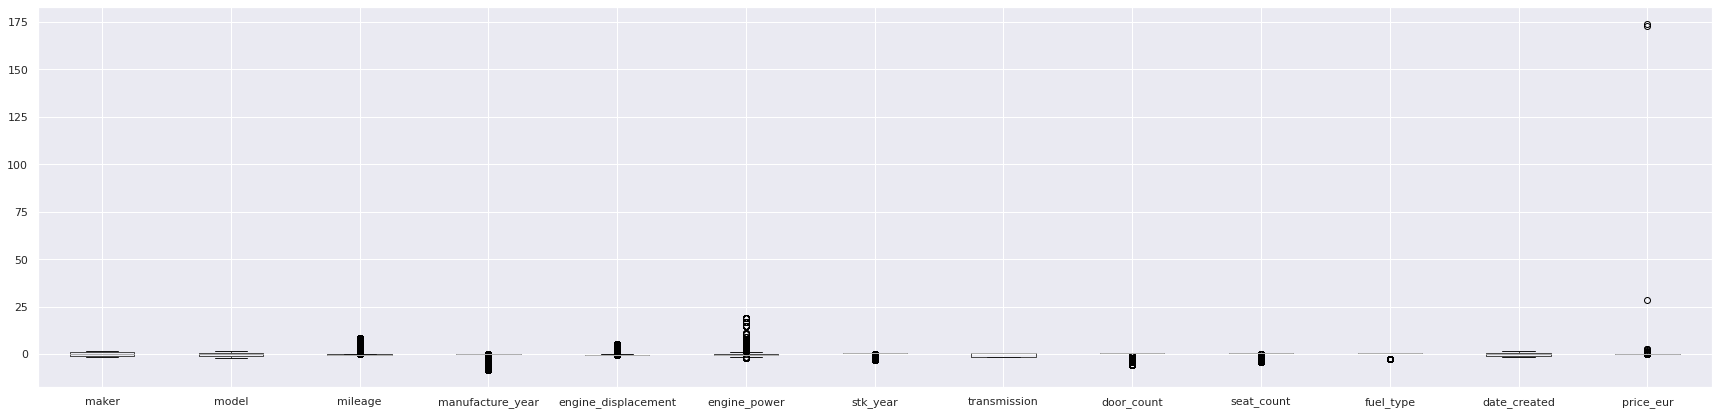

In [0]:
plt.figure(figsize=(30,7))
df.boxplot() 


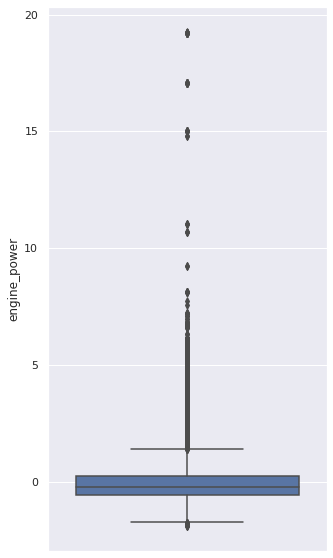

In [0]:

sns.set(rc={'figure.figsize':(5, 10)})
sns.boxplot(y=df.engine_power)

### Correlation Plot

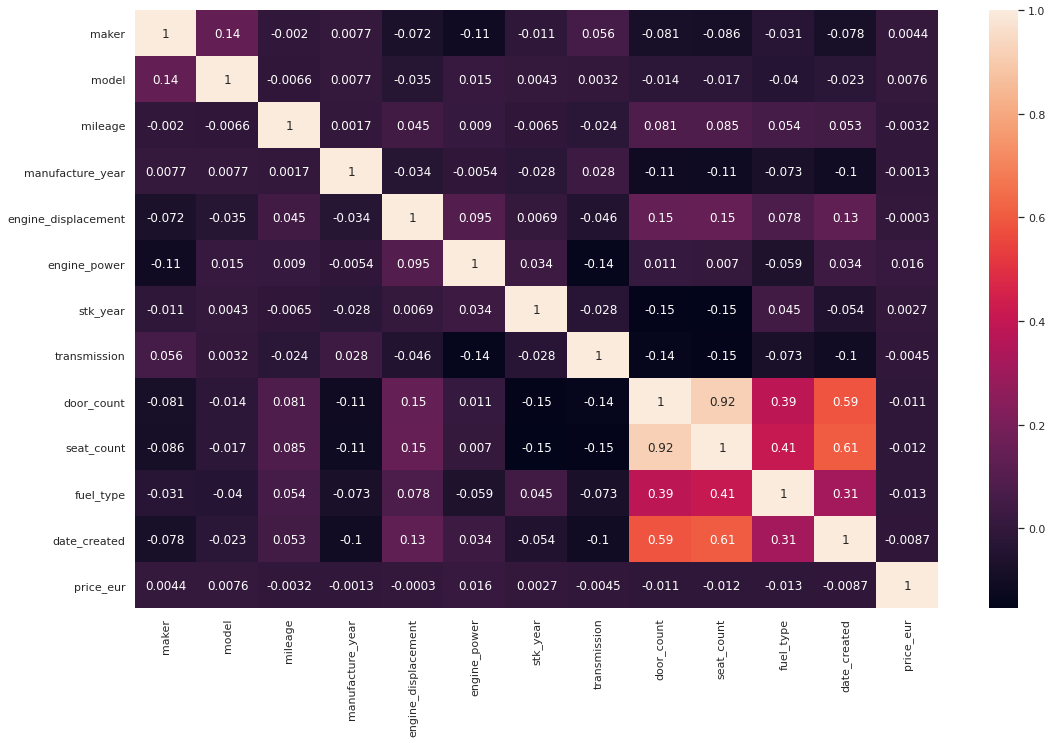

In [0]:

sns.set(rc={'figure.figsize':(18,11)})
sns.heatmap(df.corr(), annot = True)


### Splitting the data into inputs and labels

In [0]:
X = df.iloc[:, :-1]
X.shape

(61210, 13)

In [0]:
y = df.iloc[:, -1]

In [0]:
len(y)

61210

### Splitting the dataset into train test and validation set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Building Linear REgression Model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression().fit(X_train, y_train)

In [0]:
reg.coef_

array([-4.65128783e-04,  4.74781913e-04, -7.48230554e-05,  7.38469516e-05,
        3.52791622e-03, -1.02550774e-03, -2.06861884e-03,  7.55687995e-04,
       -5.80997008e-04, -4.81923004e-04, -1.92553764e-04,  1.25995905e-03,
       -3.36472168e-03])

In [0]:
reg.intercept_

0.0003327166073338259

In [0]:
y_pred = reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.01555392809976314